## Import libraries

In [53]:
import numpy as np
import pandas as pd
import plotly as plt
import sklearn
import plotly.express as px
import plotly.graph_objs as go

## Read in data

In [45]:
holiday_df = pd.read_csv('./data/holidays_events.csv')
oil_df = pd.read_csv('./data/oil.csv')
store_df = pd.read_csv('./data/stores.csv')
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
# might need to add dtype argumeent to train_df and test_df

### Check out holiday_df

In [14]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


### Check out oil_df

In [15]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


### Check out store_df

In [16]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


### Check out train_df

In [46]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [26]:
# what dtypes are in train_df
train_df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

### Check out test_df

In [18]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## EDA

In [19]:
# overall sales trend
daily_sales_df = train_df[['date', 'sales']].groupby('date').mean().reset_index()

In [20]:
daily_sales_df.head()

,date,sales
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244


In [21]:
# create visualization
fig = plt.graph_objs.Figure(data=plt.graph_objs.Scatter(x=daily_sales_df['date'],
                                                        y=daily_sales_df['sales'],
                                                        marker_color='red', text='sales'))
                        

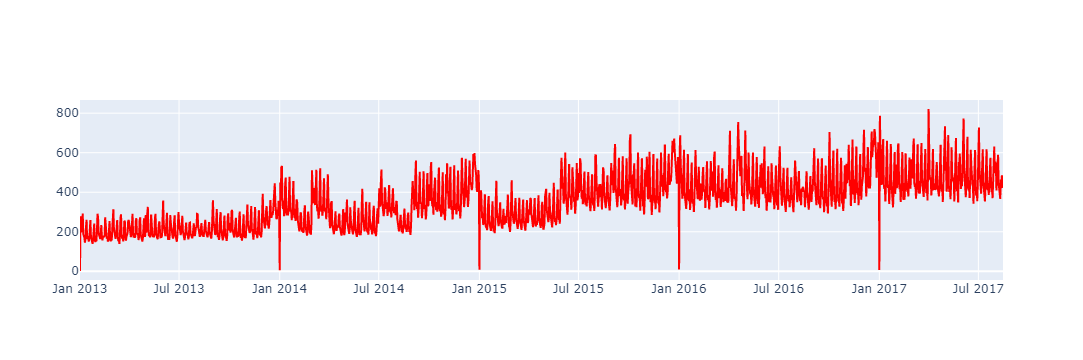

In [22]:
fig.show()

### Extract date features

In [47]:
train_df['year'] = pd.to_datetime(train_df['date']).dt.year
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['day_of_week'] = pd.to_datetime(train_df['date']).dt.day_name()

In [48]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,Tuesday


### check out sales by month

In [49]:
by_month_df = train_df.groupby(['month'])['sales'].mean().reset_index()

In [50]:
by_month_df.head()

,month,sales
0,1,341.921554
1,2,320.928869
2,3,352.009294
3,4,339.199841
4,5,341.765820


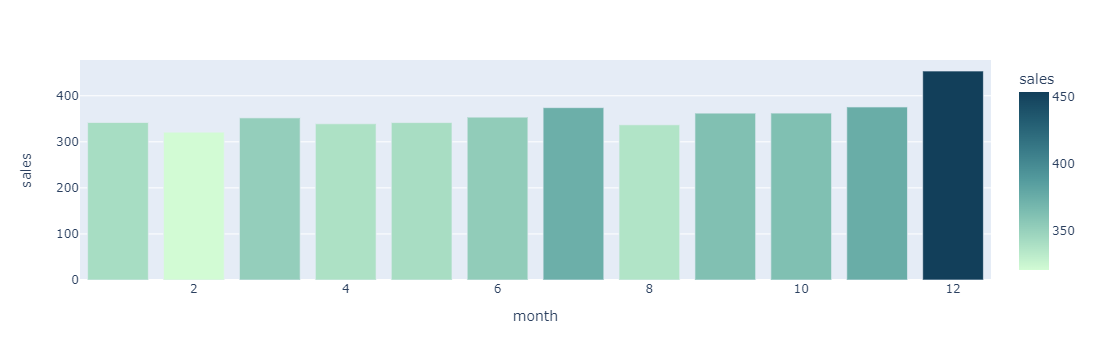

In [52]:
fig = px.bar(by_month_df, x='month', y='sales', color='sales', color_continuous_scale='darkmint')
fig.show()

### sales by day of month

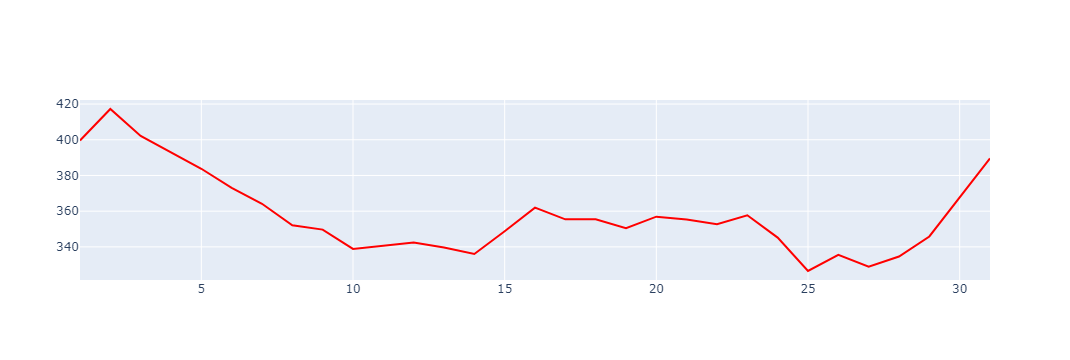

In [55]:
by_day_df = train_df.groupby(['day'])['sales'].mean().reset_index()
fig = go.Figure(data=go.Scatter(x=by_day_df['day'],
                               y=by_day_df['sales'],
                               marker_color='red', text='sales'))
fig.show()

### sales by day of week

In [58]:
by_weekday_df = train_df.groupby(['day_of_week'])['sales'].mean()

In [59]:
new_order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [60]:
by_weekday_df = by_weekday_df.reindex(new_order_week, axis=0).reset_index()

In [61]:
by_weekday_df.head()

,day_of_week,sales
0,Monday,346.544732
1,Tuesday,319.823843
2,Wednesday,332.909401
3,Thursday,283.540517
4,Friday,325.238138


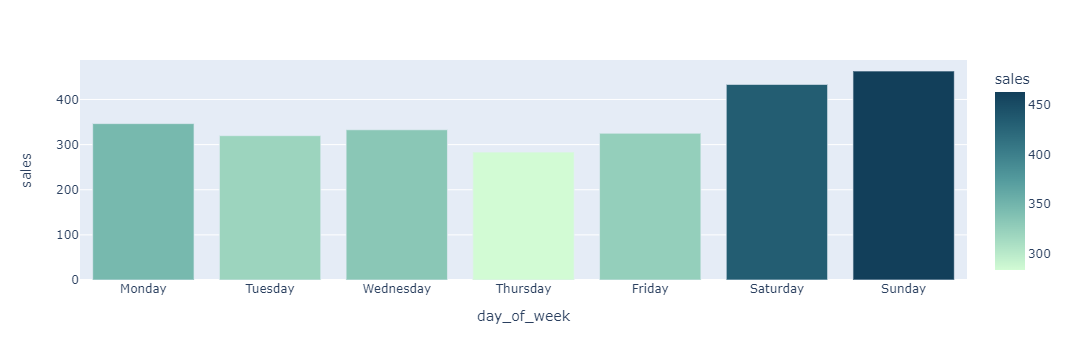

In [62]:
fig = px.bar(by_weekday_df, x='day_of_week', y='sales', color='sales', color_continuous_scale='darkmint')
fig.show()

### holiday sales

In [64]:
holiday_sales_df = pd.merge(daily_sales_df, holiday_df, on ='date', how='inner')

In [65]:
holiday_sales_df.head()

,date,sales,type,locale,locale_name,description,transferred
0,2013-01-01,1.409438,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-05,267.873244,Work Day,National,Ecuador,Recupero puente Navidad,False
2,2013-01-12,226.295293,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
3,2013-02-11,156.356672,Holiday,National,Ecuador,Carnaval,False
4,2013-02-12,173.288884,Holiday,National,Ecuador,Carnaval,False


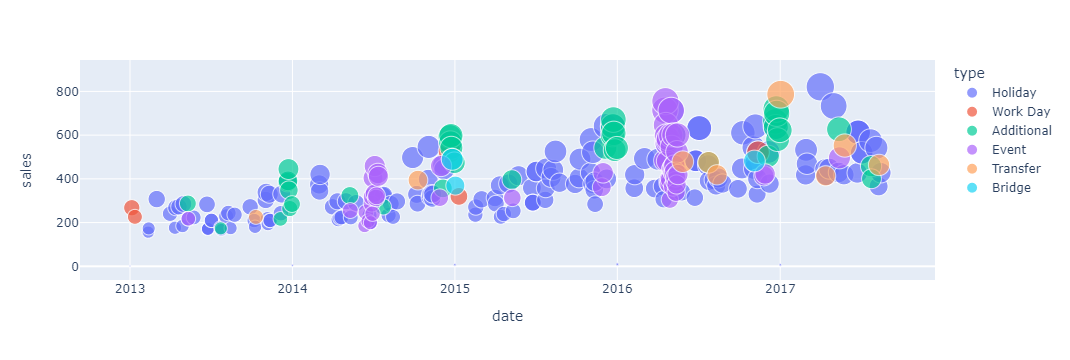

In [66]:
fig = px.scatter(holiday_sales_df, x='date', y='sales', size='sales', color='type')
fig.show()